# CREDIT  RISK MODELLING 

# 1. Setting the Background
The most pressing questions for banks are how efficiently can we guage the risk profile of our customers and how can we use this information to decide on the required liquidity while still maintaining our regulatory obligations. 

With the constantly changing customer portfolio and the ever increasing customer base a more robust non-hardcoded approach is neccessary to achieve these antagonistic goals. 

Thus comes the idea of using machine learning to develop a behavioural scorecard to pull data from both internal sources, customer transactions and their demographic data, to predict the probability of default. 

In this notebook we are going to explore the data cleaning and transformation as well as machine learing modelling in predicting probability of default. We can then use these results to develop a credit rating. 

We will eplore the following concepts in the notebook
1. Data cleaning - Struucturing the data for modelling 
2. What to do with missing values 
3. How to deal with class imbalance and the implications. 


# 2. Libraries and Data Import

In [1]:
!pip install imblearn

In [2]:
! pip install --upgrade pip

In [4]:
# General Libraries 

# import warnings
# warnings.filterwarnings('ignore')

# Data Explotation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Visualization
import seaborn as sns #Advanced Visualization

# Data modelling libraries
from sklearn.impute import SimpleImputer
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier 

from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score

In [5]:
#Loading data 
Loan = pd.read_csv("raw-data.csv", low_memory=False)
Loan.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


In [6]:
#Renaming columns in the dataset with their correct names
Loan_renamed = Loan.rename(columns={'V1': 'Customer ID',
'V2': 'Customer has bounced in first EMI', 
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced while repaying the loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes from where customer has purchased the Two wheeler',
'V10': 'Product code of Two wheeler', 
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V16': 'Date of birth',
'V17': 'Customer age when loan was taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V21': 'Max amount sanctioned in the Live loans',
'V22': 'No of new loans in last 3 months',
'V23': 'Total sanctioned amount in the secured Loans which are Live',
'V24': 'Total sanctioned amount in the unsecured Loans which are Live',
'V25': 'Maximum amount sanctioned for any Two wheeler loan',
'V26': 'Time since last Personal loan taken (in months)',
'V27': 'Time since first consumer durables loan taken (in months)',
'V28': 'No of times 30 days past due in last 6 months',
'V29': 'No of times 60 days past due in last 6 months',
'V30': 'No of times 90 days past due in last 3 months',
'V31': 'Tier',
'V32': 'Target variable'})
Loan_renamed.tail(5)

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,...,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
119523,119524,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,TIER 3,0
119524,119525,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,33000.0,NaN,NaN,3,1,0,TIER 3,1
119525,119526,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,TIER 3,0
119526,119527,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,31990.0,43600.0,NaN,13.0,0,0,0,TIER 1,0
119527,119528,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,49900.0,NaN,30.0,4,3,0,TIER 2,0


In [7]:
# Replace spaces with underscores and convert strings to lowercase
Loan_renamed.columns = Loan_renamed.columns.str.replace(' ', '_').str.lower()
Loan_renamed.head()

,customer_id,customer_has_bounced_in_first_emi,no_of_times_bounced_12_months,maximum_mob,no_of_times_bounced_while_repaying_the_loan,emi,loan_amount,tenure,dealer_codes_from_where_customer_has_purchased_the_two_wheeler,product_code_of_two_wheeler,...,total_sanctioned_amount_in_the_secured_loans_which_are_live,total_sanctioned_amount_in_the_unsecured_loans_which_are_live,maximum_amount_sanctioned_for_any_two_wheeler_loan,time_since_last_personal_loan_taken_(in_months),time_since_first_consumer_durables_loan_taken_(in_months),no_of_times_30_days_past_due_in_last_6_months,no_of_times_60_days_past_due_in_last_6_months,no_of_times_90_days_past_due_in_last_3_months,tier,target_variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


# 3. Data Cleaning

## 3.1 Missingness

In [8]:
Loan_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 32 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   customer_id                                                     119528 non-null  int64  
 1   customer_has_bounced_in_first_emi                               119528 non-null  int64  
 2   no_of_times_bounced_12_months                                   119528 non-null  int64  
 3   maximum_mob                                                     85048 non-null   float64
 4   no_of_times_bounced_while_repaying_the_loan                     85048 non-null   float64
 5   emi                                                             85048 non-null   float64
 6   loan_amount                                                     85048 non-null   float64
 7   tenure                                

Insights
1. number of rows = 119,528
2. number of columns = 32 - 31 features, 1 target variables
3. numerical columns = 26 
4. categorical columns = 6

In [9]:
# calculate age of individual from date of birth column 
from datetime import datetime

# Convert date_of_birth to datetime
Loan_renamed['date_of_birth'] = pd.to_datetime(Loan_renamed['date_of_birth'], dayfirst=True)

# Calculate age
Loan_renamed['age'] = Loan_renamed['date_of_birth'].apply(lambda x: datetime.now().year - x.year - ((datetime.now().month, datetime.now().day) < (x.month, x.day)))

Loan_renamed[['date_of_birth', 'age']].head()

,date_of_birth,age
0,1974-05-30,50.0
1,1967-09-01,57.0
2,1983-05-04,41.0
3,1989-12-10,35.0
4,1984-09-24,40.0


In [10]:
# drop date of birth & customer id as they are not required for the model
if 'date_of_birth' in Loan_renamed.columns:
    Loan_renamed.drop('date_of_birth', axis=1, inplace=True)
if 'customer_id' in Loan_renamed.columns:
    Loan_renamed.drop('customer_id', axis=1, inplace=True)
Loan_renamed.head()

,customer_has_bounced_in_first_emi,no_of_times_bounced_12_months,maximum_mob,no_of_times_bounced_while_repaying_the_loan,emi,loan_amount,tenure,dealer_codes_from_where_customer_has_purchased_the_two_wheeler,product_code_of_two_wheeler,no_of_advance_emi_paid,...,total_sanctioned_amount_in_the_unsecured_loans_which_are_live,maximum_amount_sanctioned_for_any_two_wheeler_loan,time_since_last_personal_loan_taken_(in_months),time_since_first_consumer_durables_loan_taken_(in_months),no_of_times_30_days_past_due_in_last_6_months,no_of_times_60_days_past_due_in_last_6_months,no_of_times_90_days_past_due_in_last_3_months,tier,target_variable,age
0,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,0.0,...,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0,50.0
1,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,0.0,...,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0,57.0
2,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,0.0,...,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0,41.0
3,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,2.0,...,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0,35.0
4,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,0.0,...,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0,40.0


Missingness of data

Text(0.5, 1.0, 'Missing Values Heatmap')

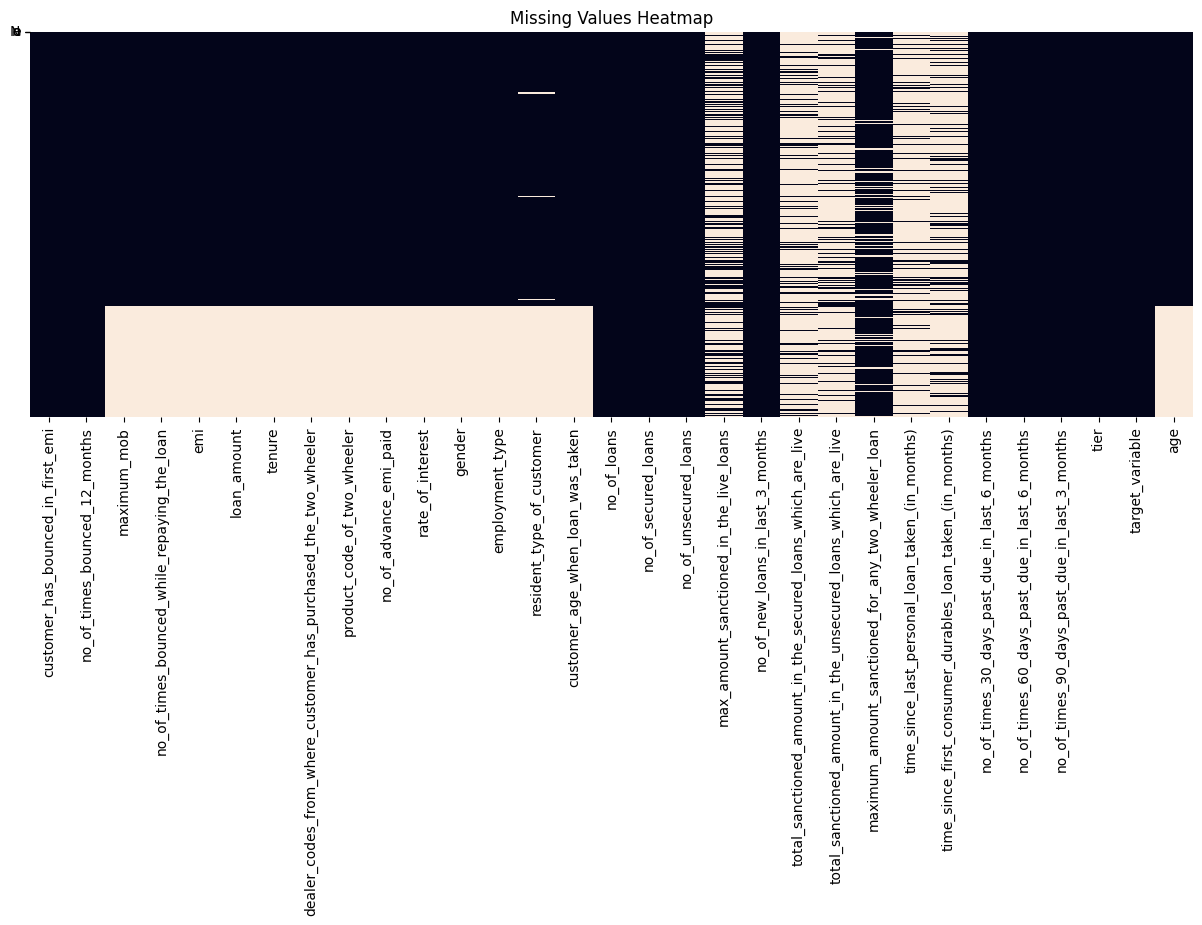

In [11]:
# plotting a heatmap to determine extent of missingness per column
plt.figure(figsize=(15,5))

sns.heatmap(Loan_renamed.isnull(), yticklabels="None", cbar=False)
plt.title("Missing Values Heatmap")

In [12]:
missing_values = Loan_renamed.isnull().sum()/Loan_renamed.shape[0]*100
print(missing_values)

customer_has_bounced_in_first_emi                                  0.000000
no_of_times_bounced_12_months                                      0.000000
maximum_mob                                                       28.846797
no_of_times_bounced_while_repaying_the_loan                       28.846797
emi                                                               28.846797
loan_amount                                                       28.846797
tenure                                                            28.846797
dealer_codes_from_where_customer_has_purchased_the_two_wheeler    28.846797
product_code_of_two_wheeler                                       28.846797
no_of_advance_emi_paid                                            28.846797
rate_of_interest                                                  28.846797
gender                                                            28.846797
employment_type                                                   28.846797
resident_typ

Insights
1. 20 columns with missing values
2. Type of missingness - missing not at random
3. % of missing values range from 12.6%  to 88%


Deleting columns with more than 80% of missing data

In [13]:
# Calculate the percentage of missing values for each column
missing_percentage = Loan_renamed.isnull().sum() / Loan_renamed.shape[0] * 100

# Drop columns with more than 80% missing values
columns_to_drop = missing_percentage[missing_percentage > 80].index
Loan_renamed.drop(columns=columns_to_drop, axis=1, inplace=True)

# Display the remaining columns
Loan_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 27 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   customer_has_bounced_in_first_emi                               119528 non-null  int64  
 1   no_of_times_bounced_12_months                                   119528 non-null  int64  
 2   maximum_mob                                                     85048 non-null   float64
 3   no_of_times_bounced_while_repaying_the_loan                     85048 non-null   float64
 4   emi                                                             85048 non-null   float64
 5   loan_amount                                                     85048 non-null   float64
 6   tenure                                                          85048 non-null   float64
 7   dealer_codes_from_where_customer_has_p

Handling missing data for numerical columns by calculating median of numerical columns with missing values and imputing the median 

In [14]:
# List of specific numerical columns
num_missing_columns = ['maximum_mob','no_of_times_bounced_while_repaying_the_loan',
                       'emi','loan_amount','tenure',
                       'dealer_codes_from_where_customer_has_purchased_the_two_wheeler',
                       'no_of_advance_emi_paid',
                       'rate_of_interest',
                       'customer_age_when_loan_was_taken',
                       'max_amount_sanctioned_in_the_live_loans',
                       'maximum_amount_sanctioned_for_any_two_wheeler_loan',
                       'age']

# Calculate median for each specified numerical column
medians = Loan_renamed[num_missing_columns].median()
print(medians)

maximum_mob                                                          17.0
no_of_times_bounced_while_repaying_the_loan                           0.0
emi                                                                2320.0
loan_amount                                                       39700.0
tenure                                                               24.0
dealer_codes_from_where_customer_has_purchased_the_two_wheeler     2307.0
no_of_advance_emi_paid                                                0.0
rate_of_interest                                                     12.6
customer_age_when_loan_was_taken                                     36.0
max_amount_sanctioned_in_the_live_loans                           95000.0
maximum_amount_sanctioned_for_any_two_wheeler_loan                42250.0
age                                                                  45.0
dtype: float64


dropped=['Time since first consumer durables loan taken (in months)','Time since last Personal loan taken (in months)',
'Max amount sanctioned in the Live loans','Total sanctioned amount in the secured Loans which are Live',
'Total sanctioned amount in the unsecured Loans which are Live','Maximum amount sanctioned for any Two wheeler loan']

Loan_renamed.drop(dropped,axis=1,inplace=True)

In [15]:
# Replace NaNs with median values for the specified numerical columns
for column in num_missing_columns:
    median_value = medians[column]
    Loan_renamed[column] = Loan_renamed[column].fillna(value=median_value)

Loan_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 27 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   customer_has_bounced_in_first_emi                               119528 non-null  int64  
 1   no_of_times_bounced_12_months                                   119528 non-null  int64  
 2   maximum_mob                                                     119528 non-null  float64
 3   no_of_times_bounced_while_repaying_the_loan                     119528 non-null  float64
 4   emi                                                             119528 non-null  float64
 5   loan_amount                                                     119528 non-null  float64
 6   tenure                                                          119528 non-null  float64
 7   dealer_codes_from_where_customer_has_p

Handling missing data for categorical columns by calculating mode of categorical columns and replacing missing values with the mode

In [16]:
# List of specific categorical columns
cat_missing_columns = ['product_code_of_two_wheeler','gender', 'employment_type','resident_type_of_customer']

# Calculate mode for each specified categorical column
modes = Loan_renamed[cat_missing_columns].mode()
print(modes)

  product_code_of_two_wheeler gender employment_type resident_type_of_customer
0                          SC   MALE            SELF                     OWNED


In [18]:
# Replace NaNs with mode values for the specified categorical columns
for column in cat_missing_columns:
    mode_value = modes[column].iloc[0]
    Loan_renamed[column] = Loan_renamed[column].fillna(value=mode_value)

Loan_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 27 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   customer_has_bounced_in_first_emi                               119528 non-null  int64  
 1   no_of_times_bounced_12_months                                   119528 non-null  int64  
 2   maximum_mob                                                     119528 non-null  float64
 3   no_of_times_bounced_while_repaying_the_loan                     119528 non-null  float64
 4   emi                                                             119528 non-null  float64
 5   loan_amount                                                     119528 non-null  float64
 6   tenure                                                          119528 non-null  float64
 7   dealer_codes_from_where_customer_has_p

Text(0.5, 1.0, 'Missing Values Heatmap')

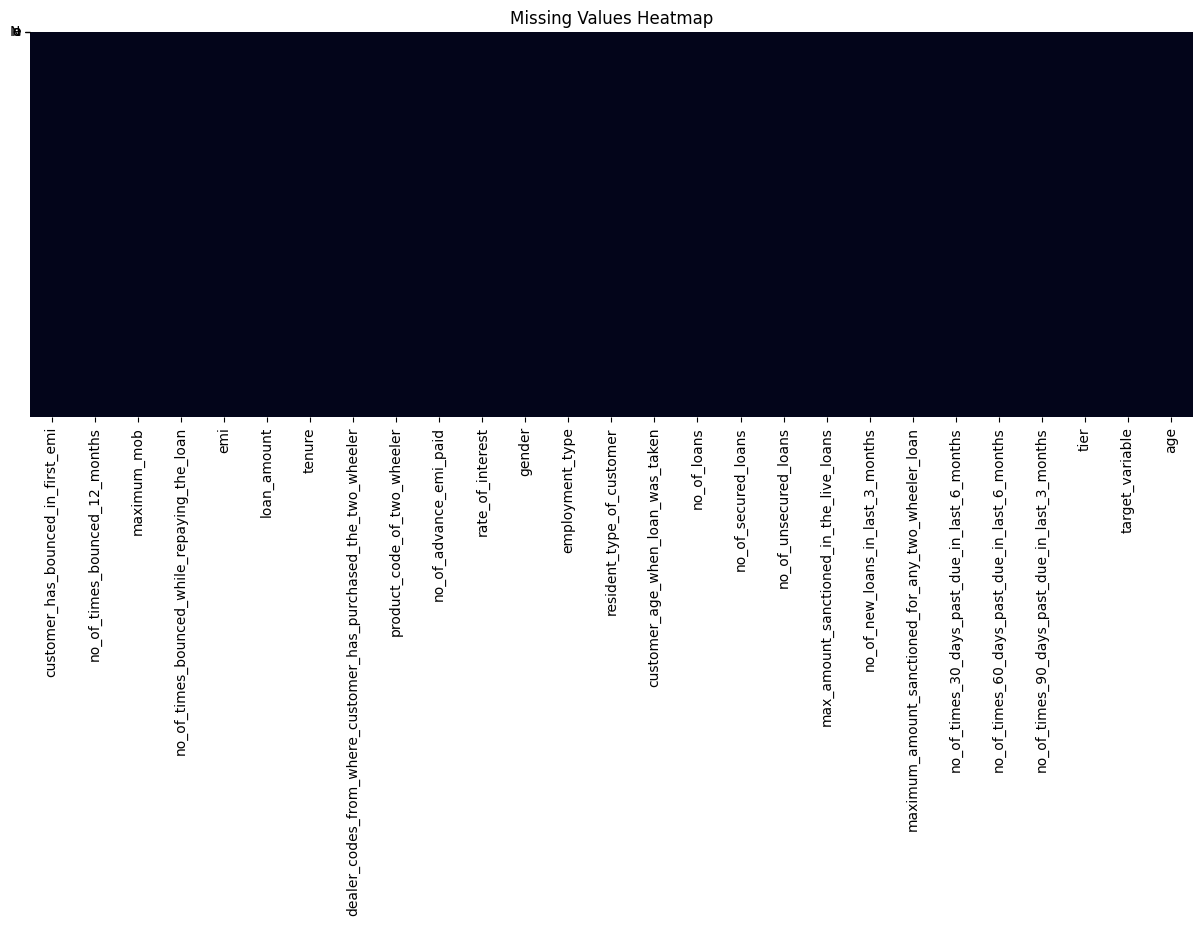

In [19]:
# plotting a heatmap to determine extent of missingness per column
plt.figure(figsize=(15,5))

sns.heatmap(Loan_renamed.isnull(), yticklabels="None", cbar=False)
plt.title("Missing Values Heatmap")

# 4. EDA

Heat Map

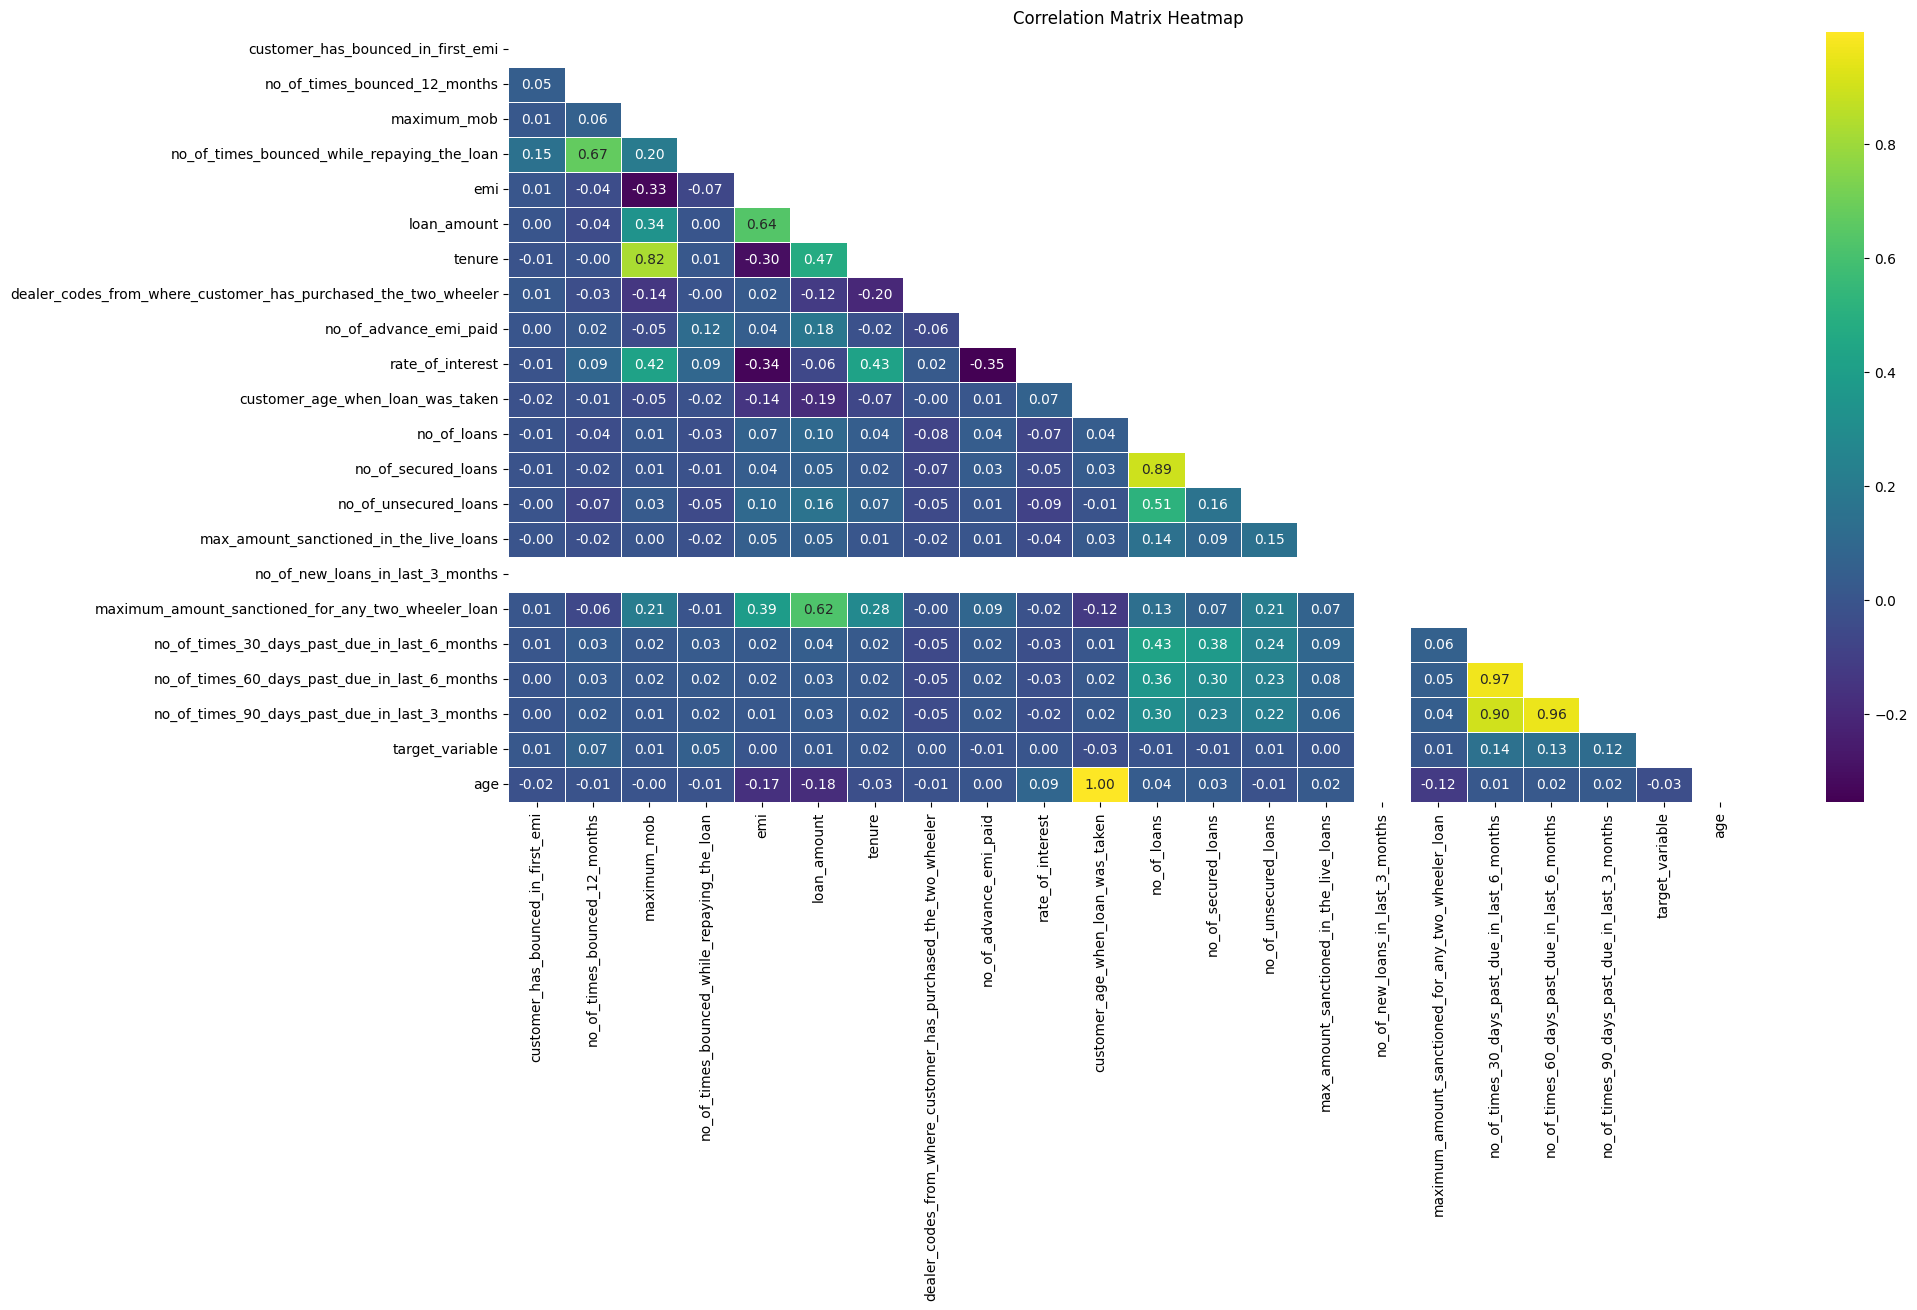

In [20]:
# Define num_columns
num_columns = Loan_renamed.select_dtypes(include=['int64', 'float64']).columns

#correlation matrix
correlation_matrix = Loan_renamed[num_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap="viridis", linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

Count plot of Defaulters vs Non Defaulters

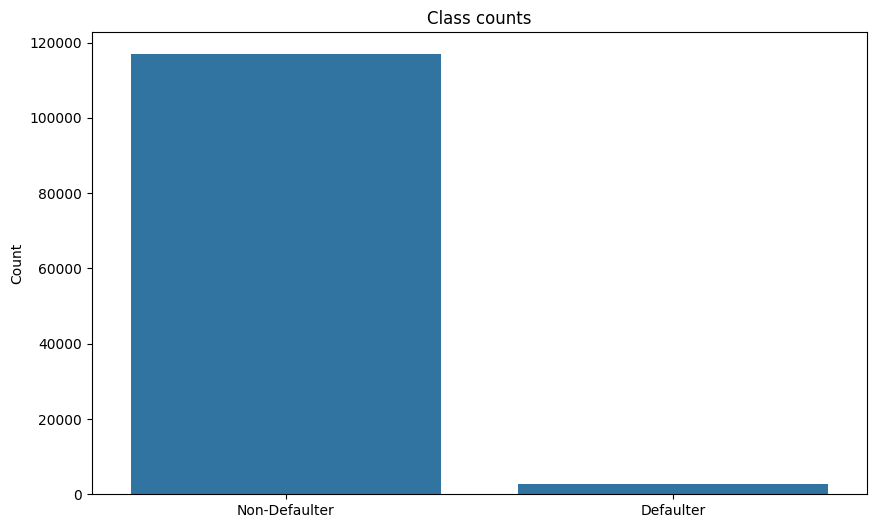

target_variable
0    116914
1      2614
Name: count, dtype: int64


In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=Loan_renamed, x='target_variable')
plt.title('Class counts')
plt.xticks((0, 1), ["Non-Defaulter", "Defaulter"])
plt.xlabel('')
plt.ylabel('Count')
plt.show()

print(Loan_renamed['target_variable'].value_counts())

The data set is pretty imbalanced as expected where positive examples defualters are significanltly less than 25%. We'll explain in the next section how to handle all of them after giving an overview of ensemble methods


Distribution of loan amount, loan amount vs tier and employment type

<font color='white'>For the three plots about LOAN AMOUNT, you could indicate why each is significant and what insights it gives that are different from the other or maybe what it adds on.</font>

<Axes: title={'center': 'Loan Amount (Box Plot)'}, xlabel='employment_type', ylabel='loan_amount'>

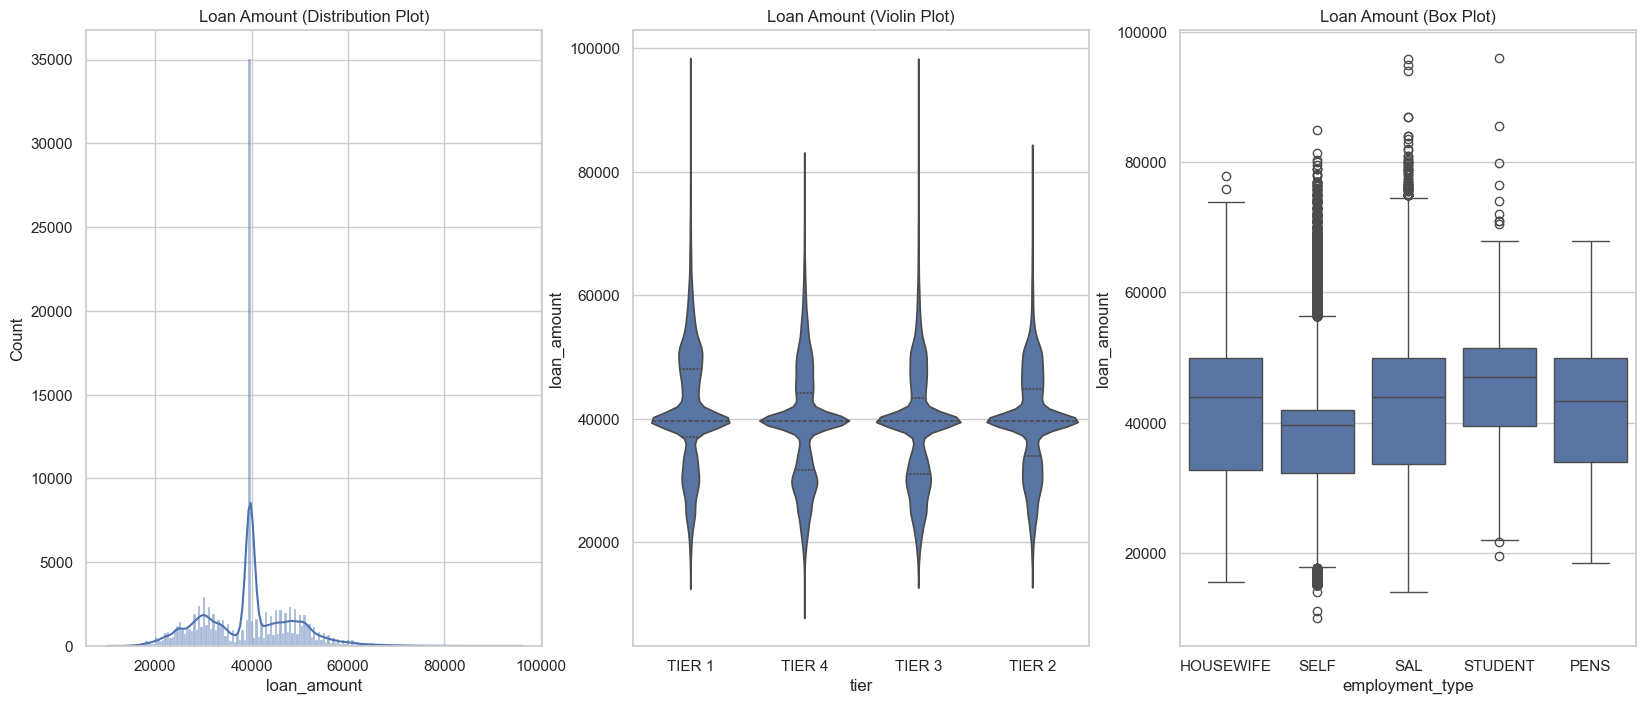

In [22]:
import seaborn as sns

sns.set(style="whitegrid")

fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("Loan Amount (Distribution Plot)")
sns.histplot(Loan_renamed['loan_amount'],ax=ax[0], kde=True)
ax[1].set_title("Loan Amount (Violin Plot)")
sns.violinplot(data =Loan_renamed, x='tier',y='loan_amount',ax=ax[1], inner="quartile")
ax[2].set_title("Loan Amount (Box Plot)")
sns.boxplot(data =Loan_renamed, x='employment_type',y='loan_amount',ax=ax[2],orient='v')

Insights:
1. Distribution of loan amount - the data has multimodal normal distribution
2. Tier 1 & 3 clients have the most spread out loan amounts. There are outliers for each tier of client.
3. Housewife, self, sal and student employment types have outliers. Self has the most outliers and is the least spread out. Student have higher loan amounts.

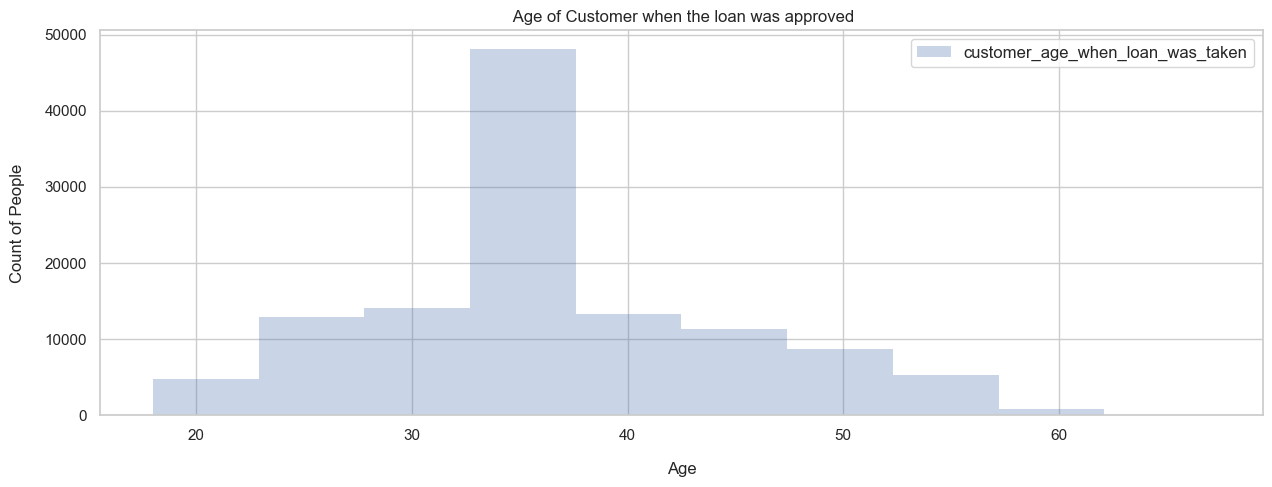

In [23]:
##Age- age at which the client took the loan
plt.figure(figsize=(15,5))

#bar plot
Loan_renamed['customer_age_when_loan_was_taken'].plot(kind='hist', color='b', alpha=0.3, edgecolor='none')
plt.xlabel("Age", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title(" Age of Customer when the loan was approved")
plt.legend(loc="best", prop={"size":12})

Insights:
1. Most loans are taken by customers in the mid 30's

<Axes: xlabel='customer_age_when_loan_was_taken', ylabel='loan_amount'>

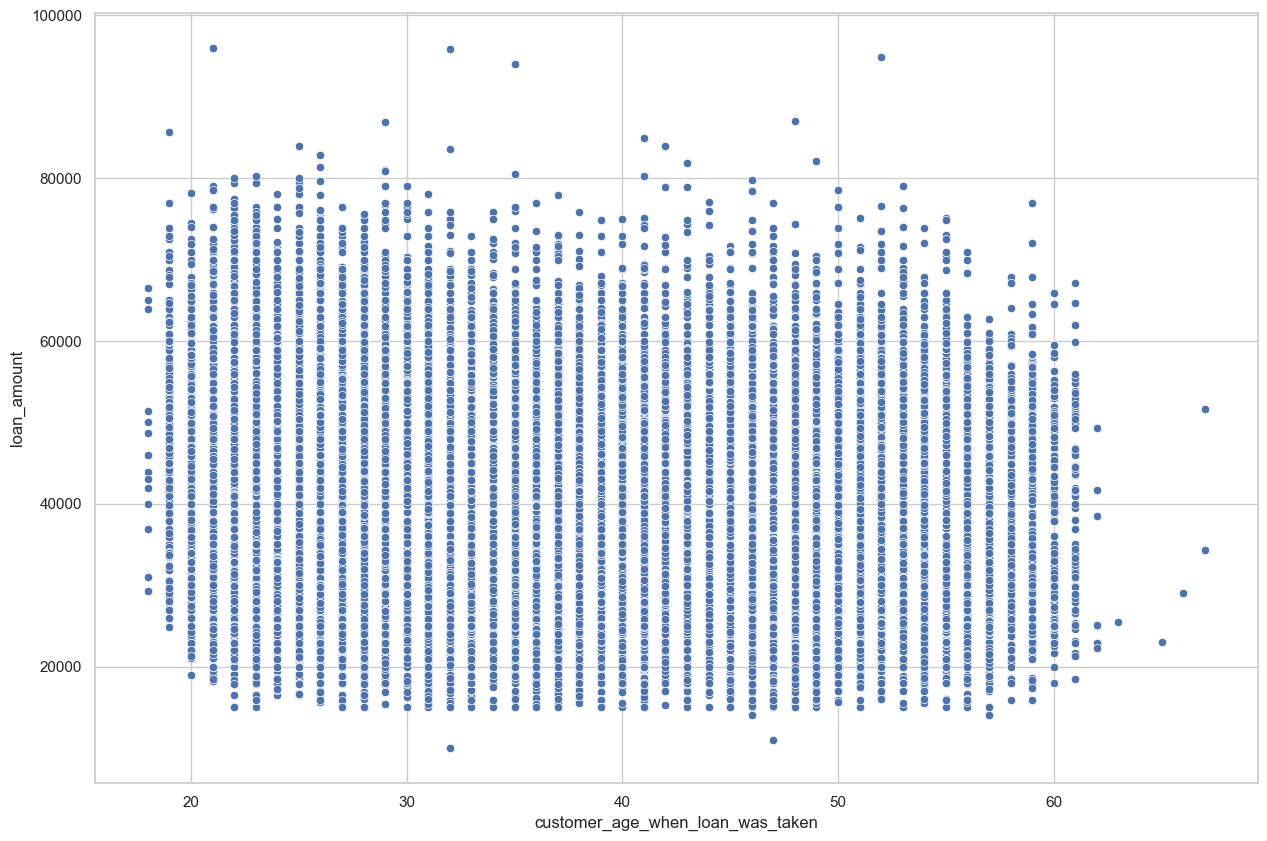

In [24]:
# Explore correlation between age and loan amount 
plt.figure(figsize=(15,10))
sns.scatterplot(x=Loan_renamed['customer_age_when_loan_was_taken'], y=Loan_renamed['loan_amount'])

Insights
1. there seems to be no correlation between the age of a customer when loan was taken and loan amount

Investigate relationship between categorical and the target variable

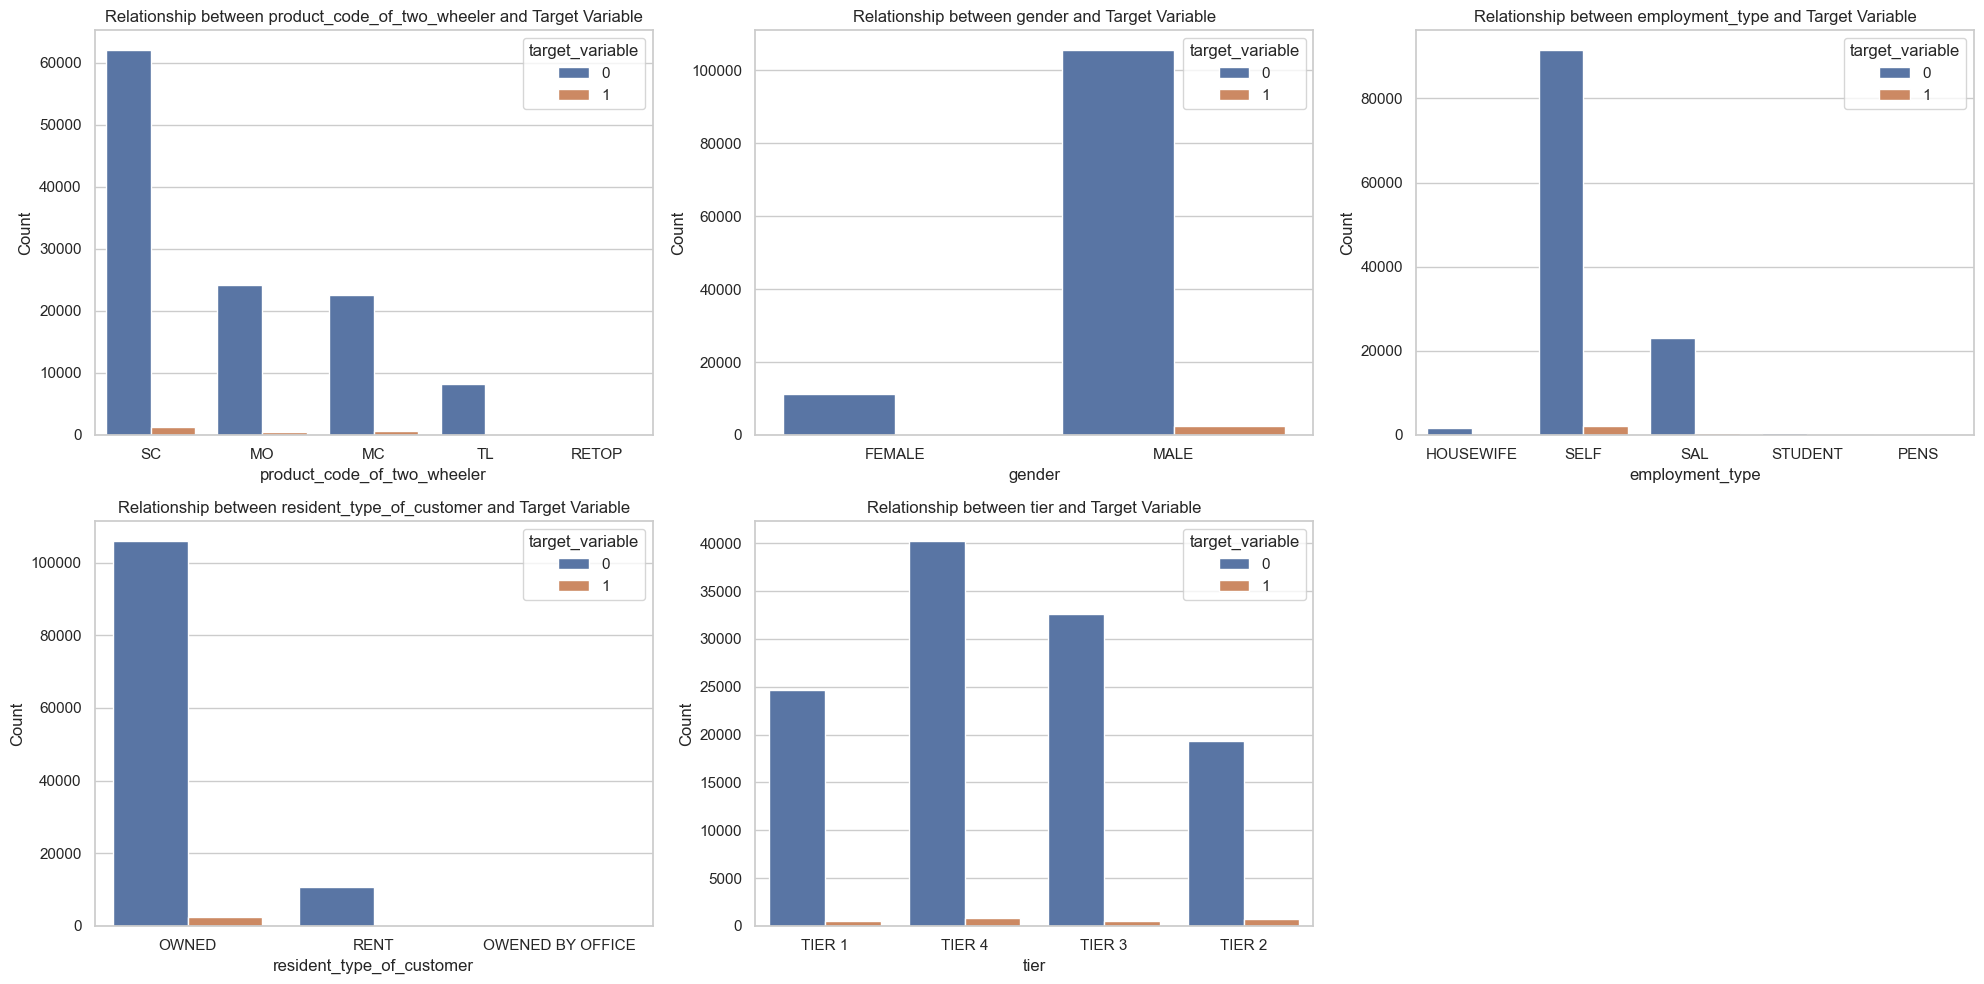

In [25]:
categorical_columns = ['product_code_of_two_wheeler', 'gender', 'employment_type', 'resident_type_of_customer', 'tier']

plt.figure(figsize=(20, 10))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)  # Adjusted to 3 rows and 2 columns to fit 5 plots
    sns.countplot(data=Loan_renamed, x=column, hue='target_variable')
    plt.title(f'Relationship between {column} and Target Variable')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Insights:
1. SC product code of two wheeler has most defaulters
2. Male gender had more defaulters
3. self employment type had most defaulters
4. owned resident type had most defaulters
5. All tiers had defaulters, but tier 4 had most defaulters


Investigate relationship between numerical and the target variable

Check separatability of classes for the numerical values

/var/folders/cr/zjnlz7n11qv2jsbtjt_czl180000gn/T/ipykernel_12729/185584512.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(Loan_renamed[column][Loan_renamed['target_variable'] == 1], label='Default', fill=True)
/var/folders/cr/zjnlz7n11qv2jsbtjt_czl180000gn/T/ipykernel_12729/185584512.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(Loan_renamed[column][Loan_renamed['target_variable'] == 0], label='Non defaulter', fill=True)
/var/folders/cr/zjnlz7n11qv2jsbtjt_czl180000gn/T/ipykernel_12729/185584512.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(Loan_renamed[column][Loan_renamed['target_variable'] == 1], label='Default', fill=True)
/var/folders/cr/zjnlz7n11qv2jsbtjt_czl180000gn/T/ipykernel_12729/185584512.py:6: UserWarning: Dat

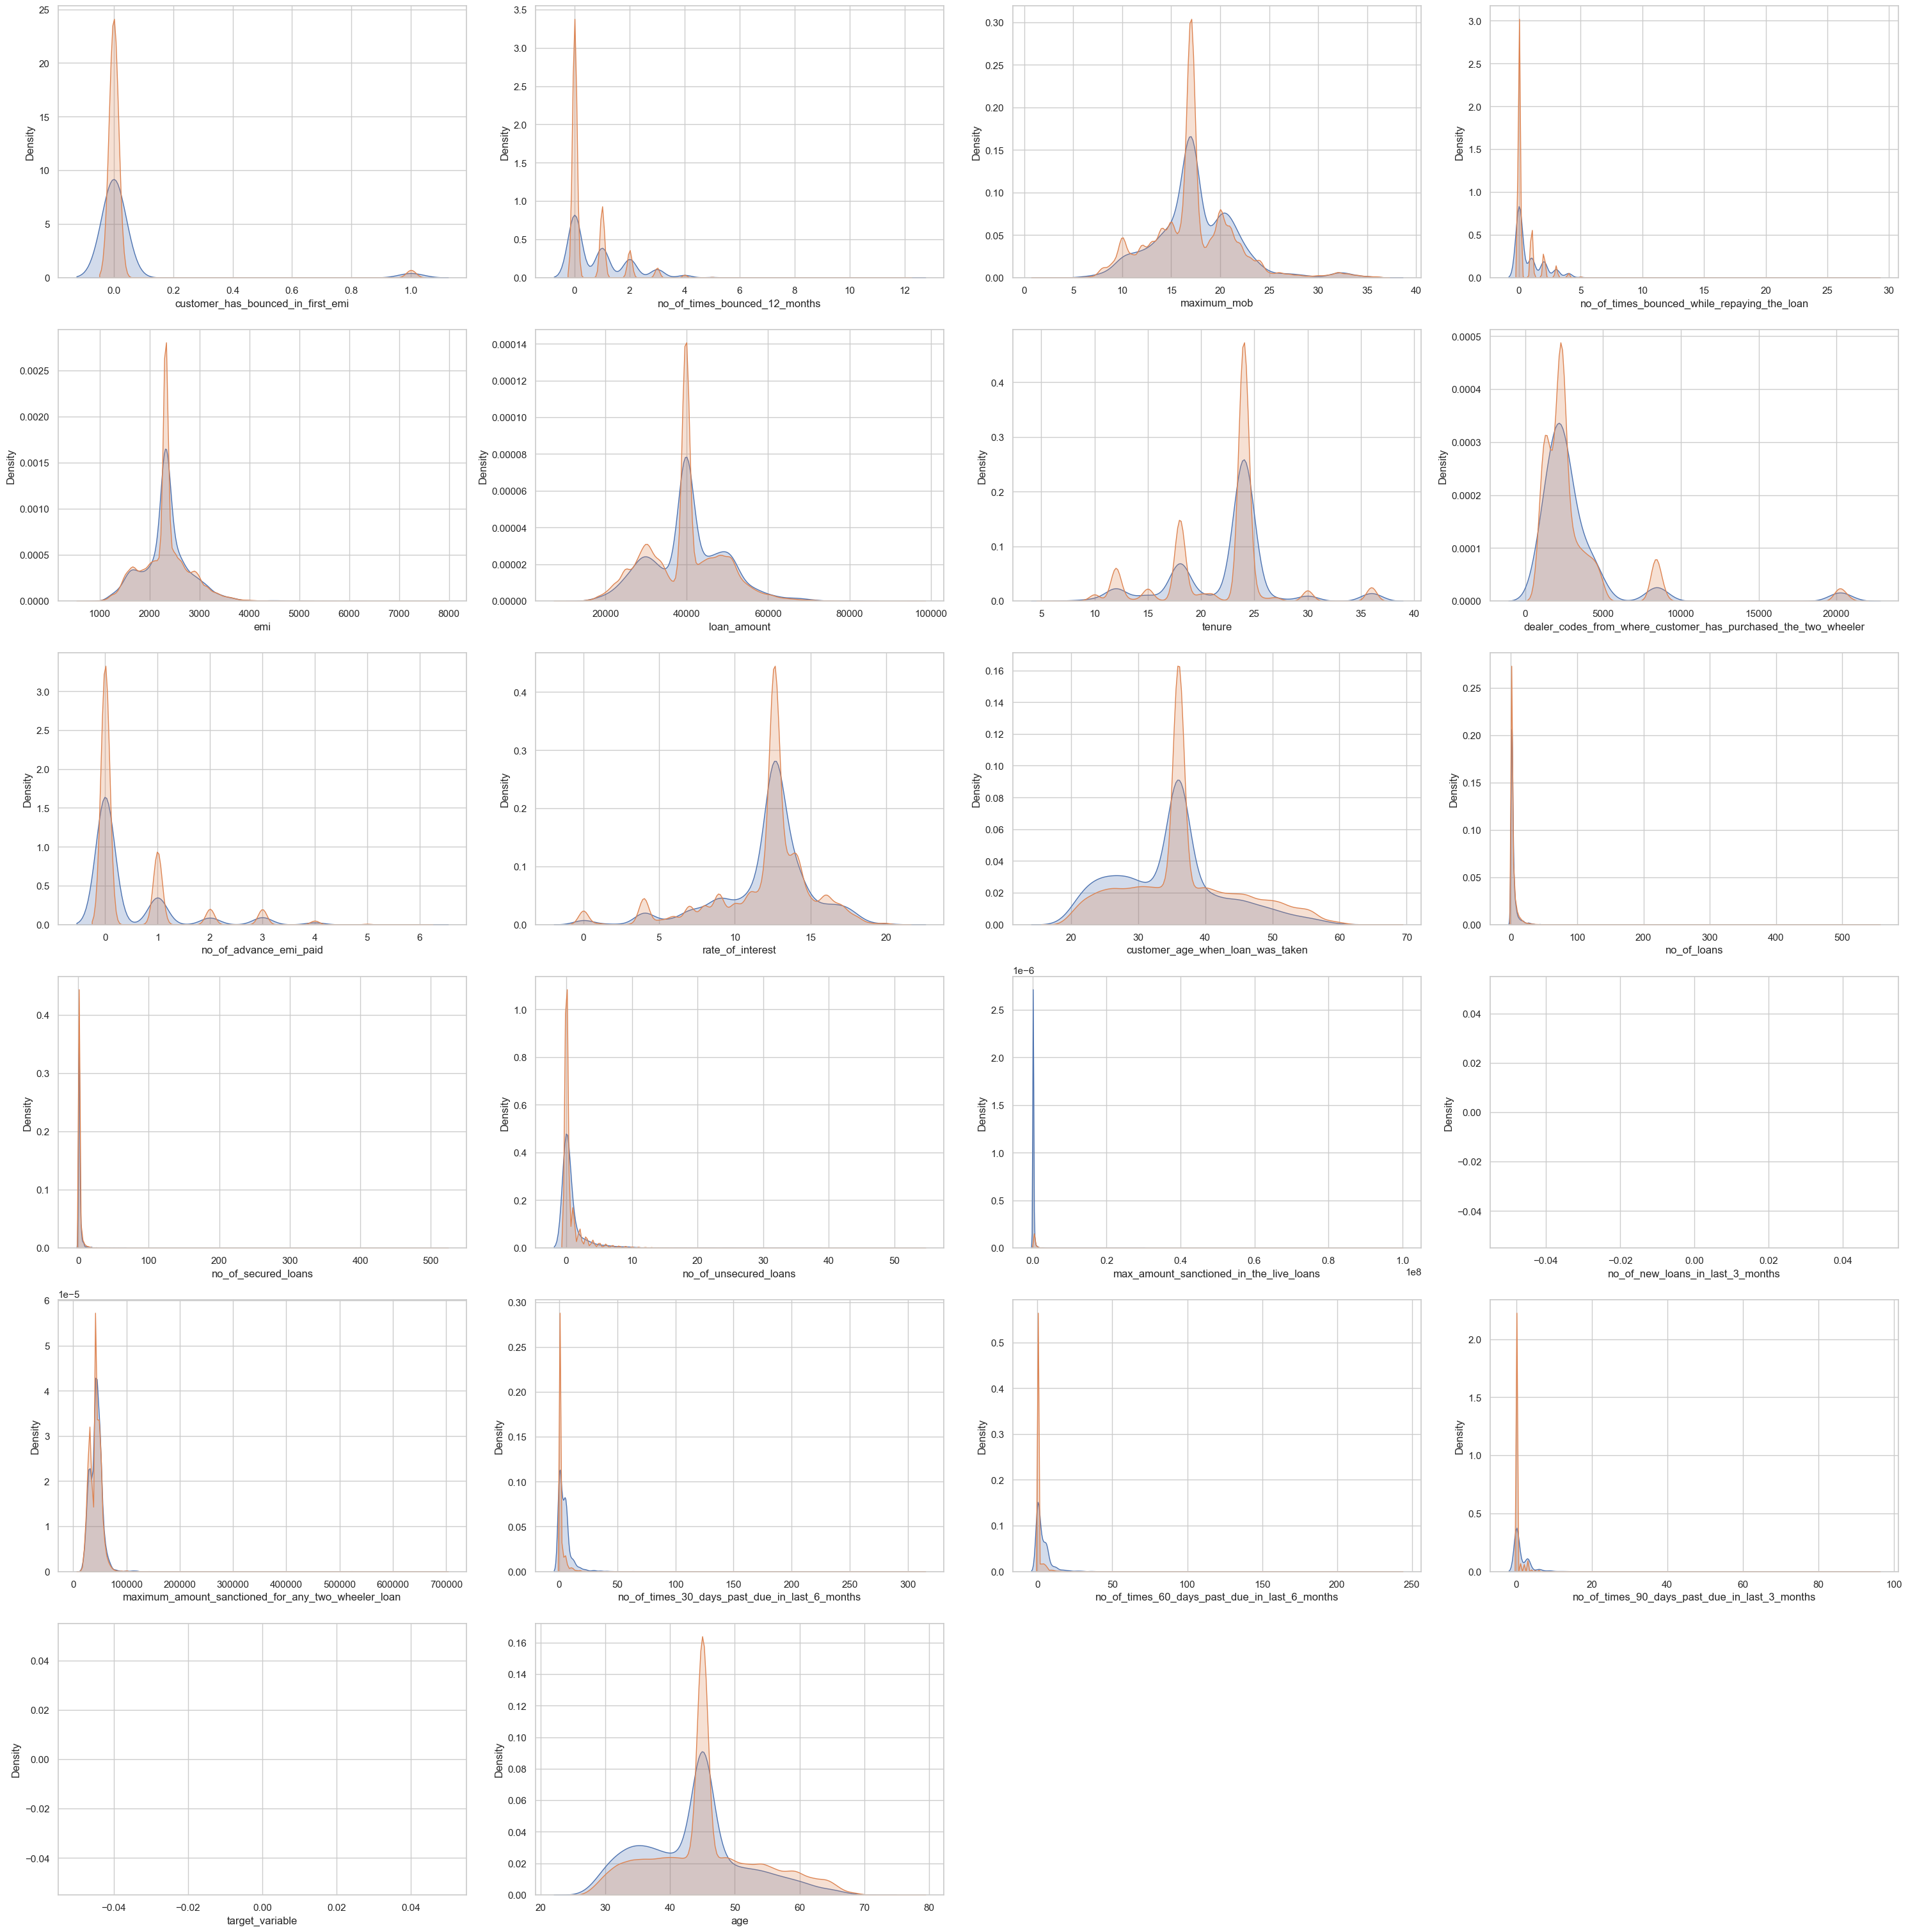

In [26]:
#Univariate Data Analysis (Kernel Density Estimate) for the numerical columns
fig = plt.figure(figsize=(30,40))
for i, column in enumerate(num_columns, 1):
    ax = fig.add_subplot(8,4, i)
    sns.kdeplot(Loan_renamed[column][Loan_renamed['target_variable'] == 1], label='Default', fill=True)
    sns.kdeplot(Loan_renamed[column][Loan_renamed['target_variable'] == 0], label='Non defaulter', fill=True)
    plt.xlabel(column)
plt.tight_layout()
plt.show()

Insight: 
1. There is no clear separatability of defaulters and non defaulters for each numerical column/feature

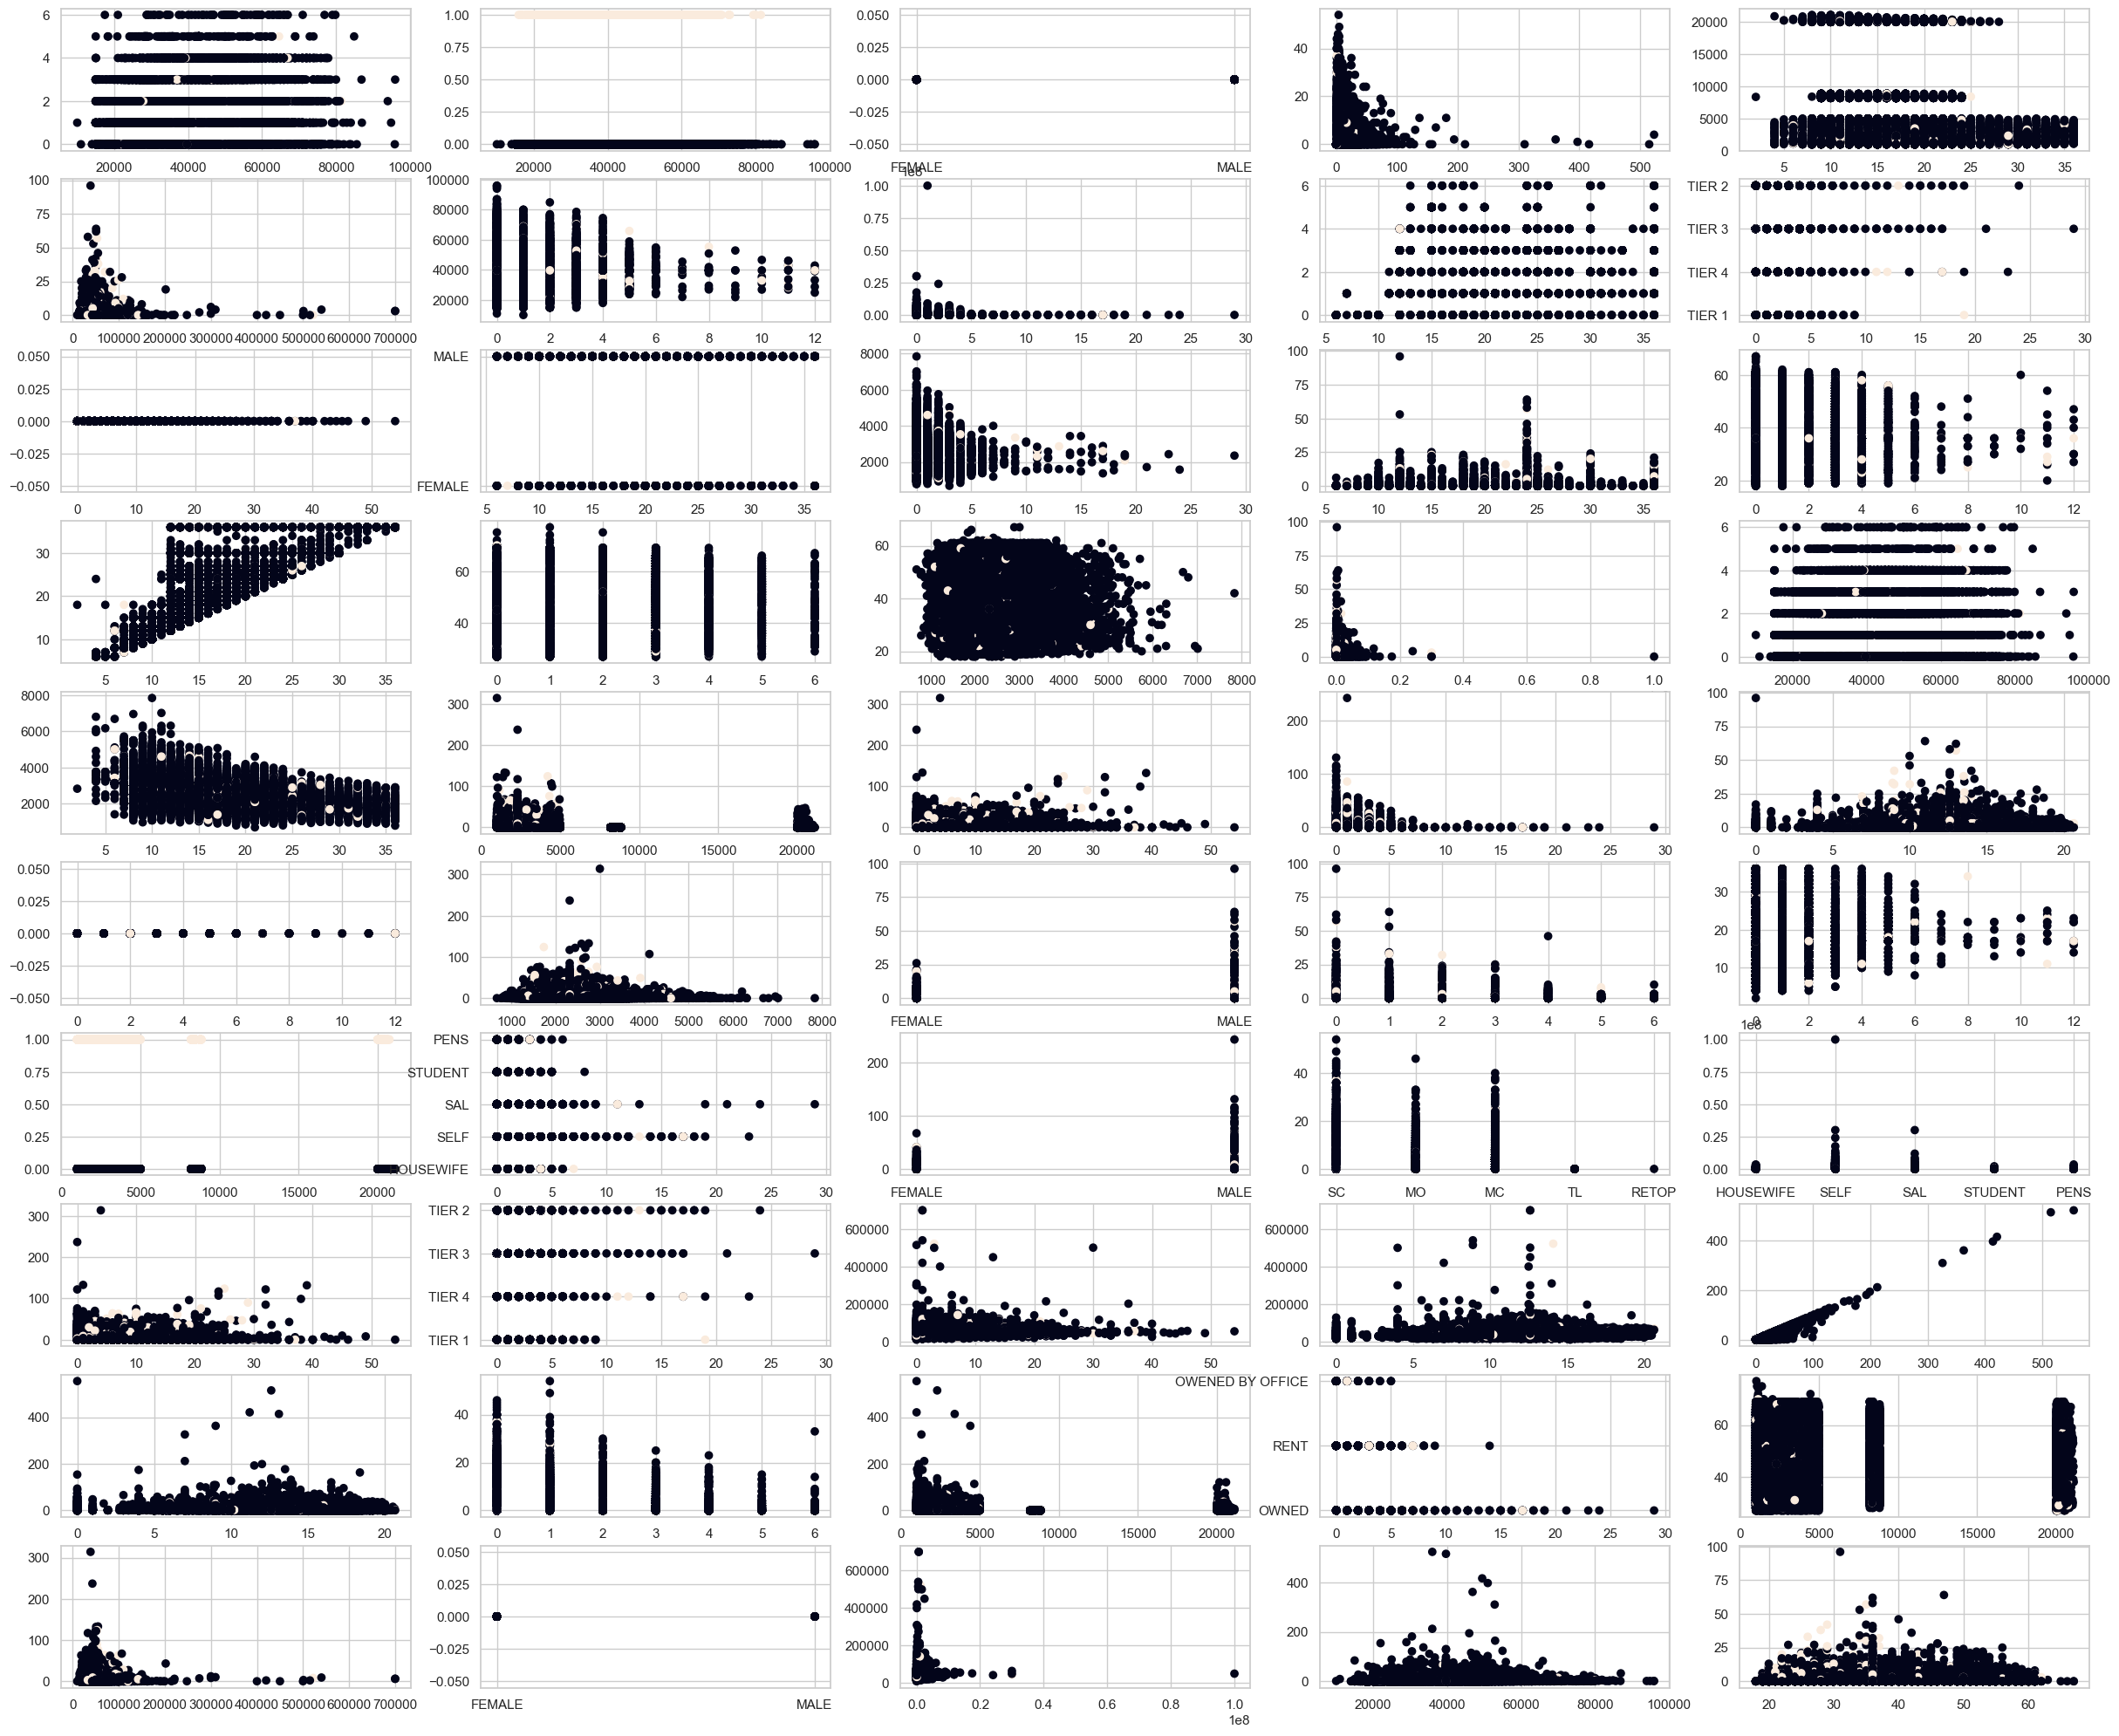

In [30]:
import random

#Bivariate Data Analysis (Scatter Plots)
comb = list(itertools.combinations([a for a in range(1, len(Loan_renamed.columns))], 2)) #Create combinations of all features, in twos (bivariate)
rand = random.choices(comb, k=50) 

fig = plt.figure(figsize=(30,25))
for i in range(len(rand)):
    ax = fig.add_subplot(10,5, i+1)
    plt.scatter(Loan_renamed[Loan_renamed.columns[rand[i][0]]],Loan_renamed[Loan_renamed.columns[rand[i][1]]],c=Loan_renamed.target_variable)

Insights:
1. For majority of the features, there is no clear separatability. Chosen classification to be applicable for classes that do not have clear separatability i.e non-parametric methods of classification. 

Check for outliers in the numerical columns

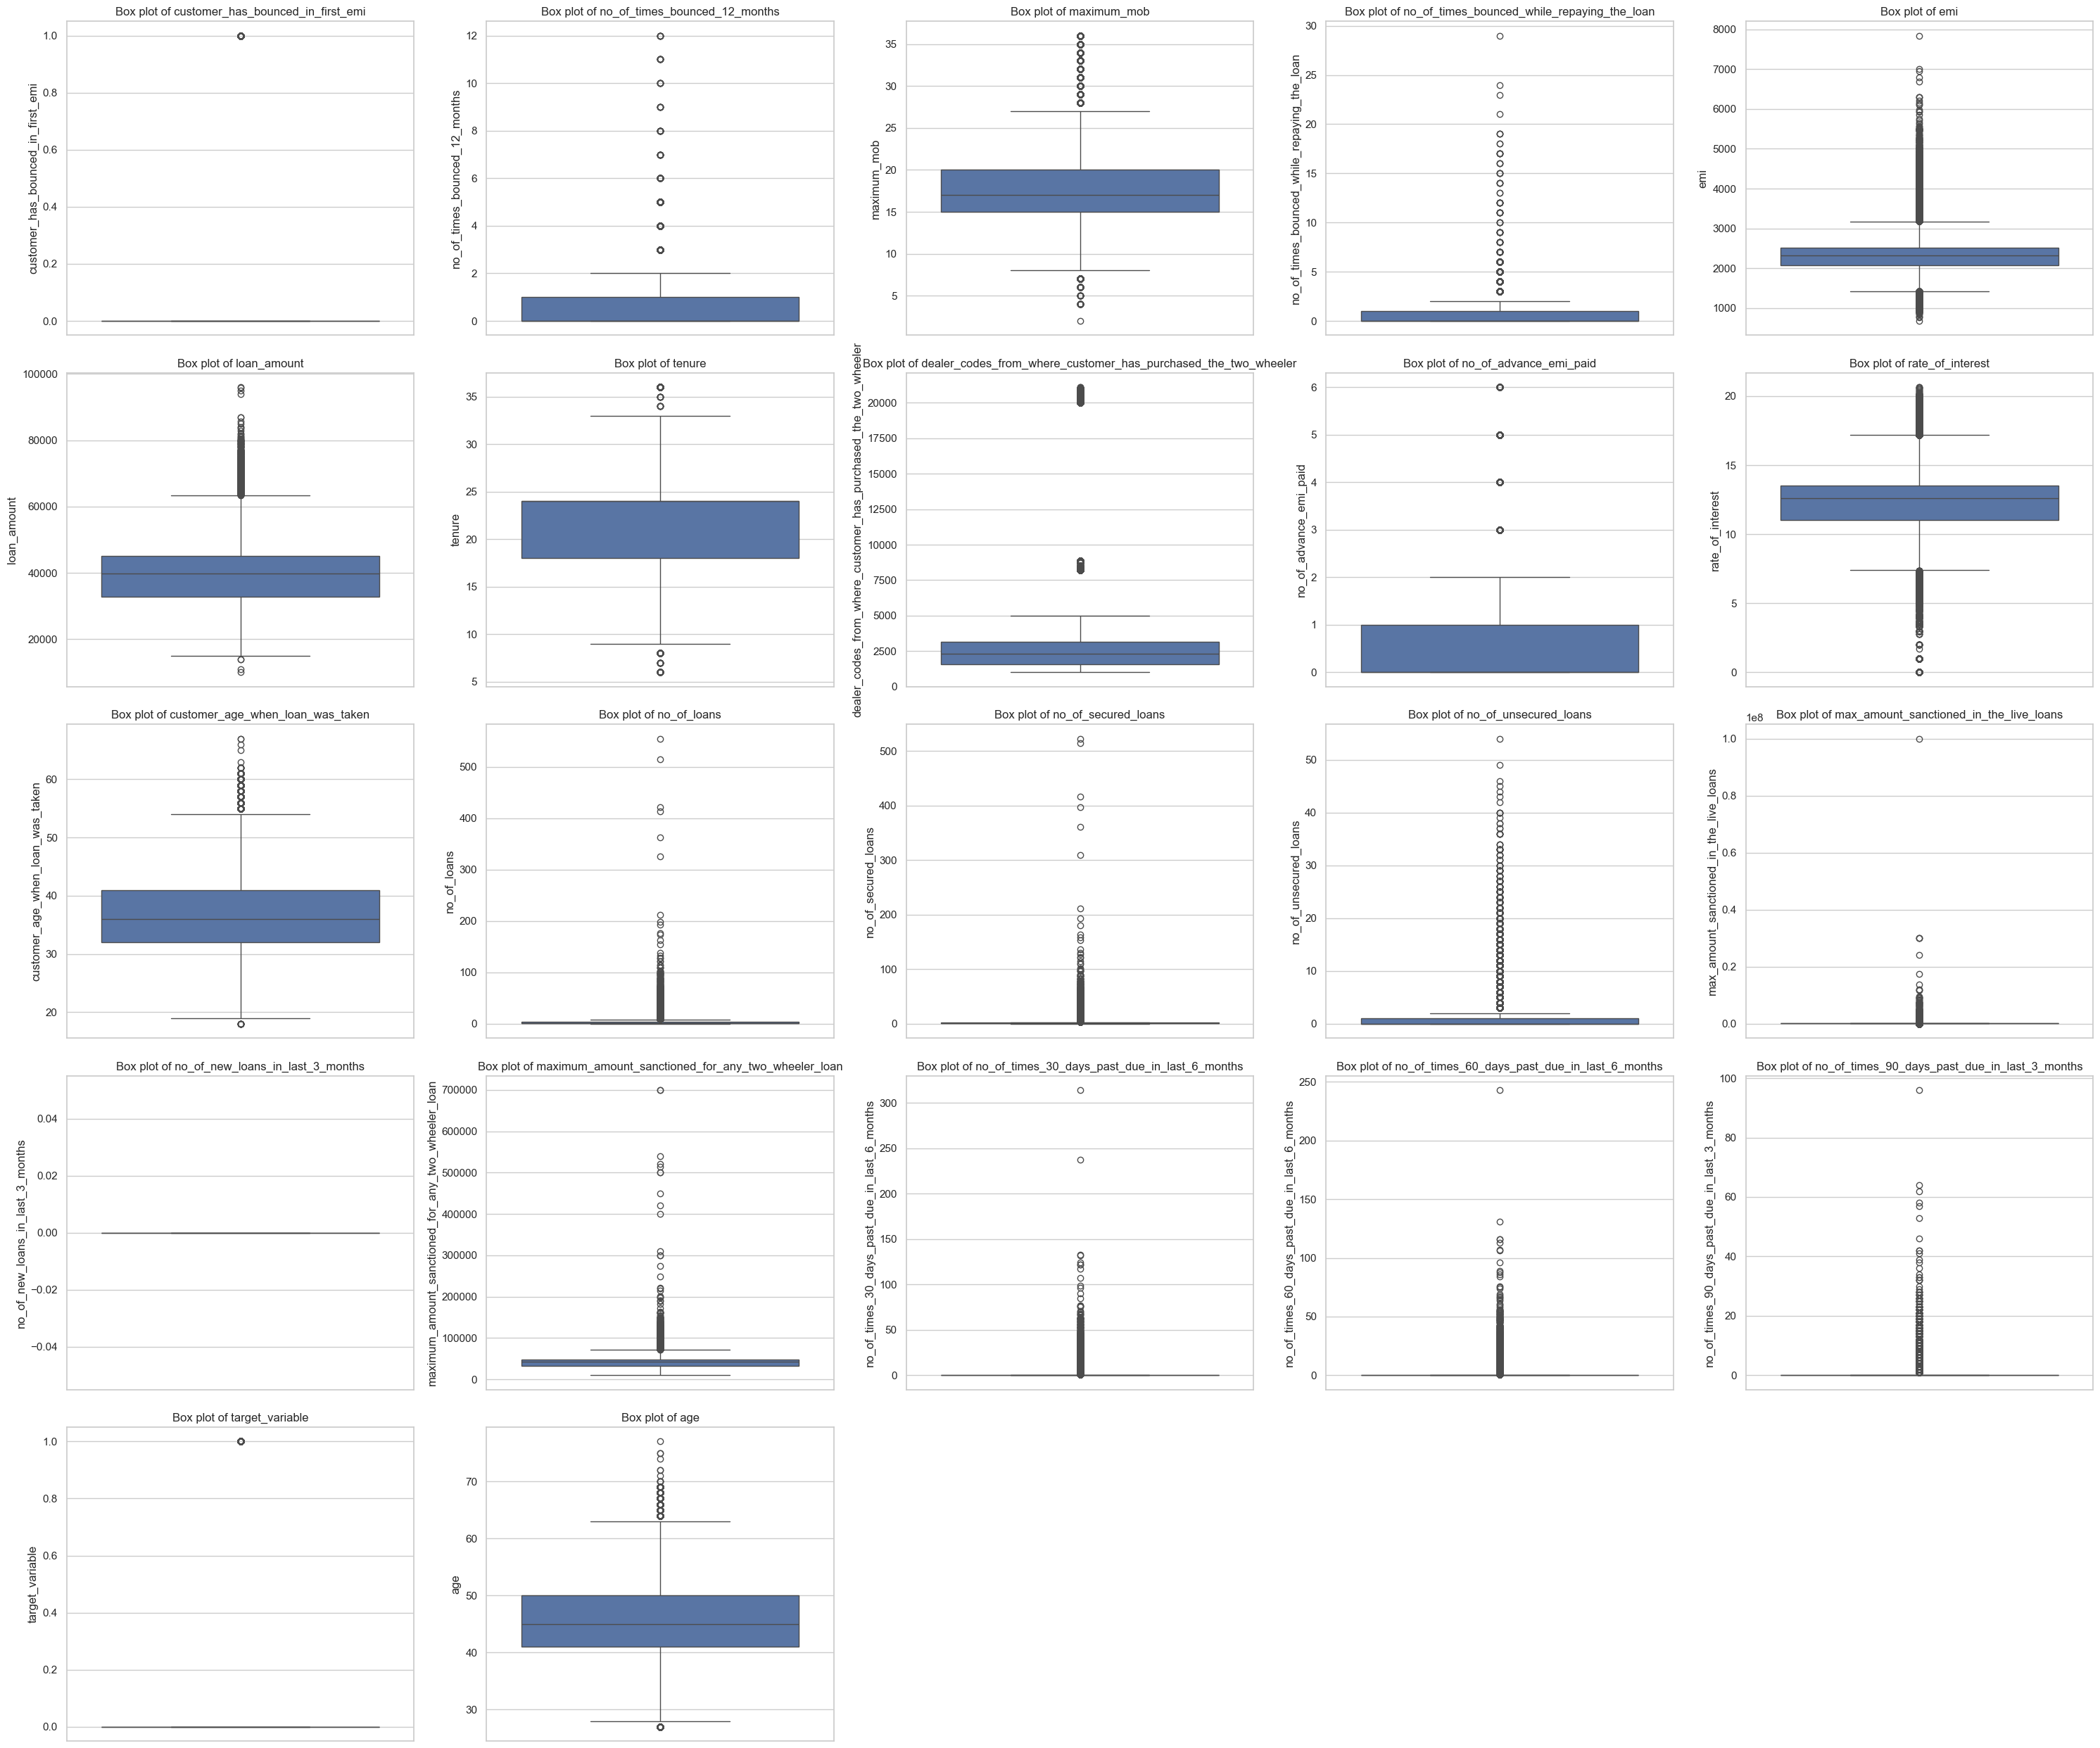

In [27]:
plt.figure(figsize=(30, 25))

for i, column in enumerate(num_columns, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(data=Loan_renamed, y=column)
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

Insights:
Majority of the numerical features have multiple outliers. This will need to be scaled using robust scaling.


In [28]:
Loan_renamed.no_of_new_loans_in_last_3_months.describe()

count    119528.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: no_of_new_loans_in_last_3_months, dtype: float64

## 5. Data Preprocessing

# 5.1 Feature scaling

Check unique variables for the categorical features

In [29]:
# Determine number of unique values per categorical column
unique_values_per_column = Loan_renamed[categorical_columns].nunique()
print(unique_values_per_column)

product_code_of_two_wheeler    5
gender                         2
employment_type                5
resident_type_of_customer      3
tier                           4
dtype: int64


In [30]:
# Determine unique values for each categorical column
for column in categorical_columns:
    unique_values = Loan_renamed[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in product_code_of_two_wheeler: ['SC' 'MO' 'MC' 'TL' 'RETOP']
Unique values in gender: ['FEMALE' 'MALE']
Unique values in employment_type: ['HOUSEWIFE' 'SELF' 'SAL' 'STUDENT' 'PENS']
Unique values in resident_type_of_customer: ['OWNED' 'RENT' 'OWENED BY OFFICE']
Unique values in tier: ['TIER 1' 'TIER 4' 'TIER 3' 'TIER 2']


Isights:
The categorical columns have low cardinality as they are ranging from 2 to 5, therefore the best technique for encoding is one hot encoding so as to preserve the category information. 

Encoding categorical variables using one hot encoding


In [31]:
# One hot encoding for categorical columns
Loan_encoded_oh = pd.get_dummies(Loan_renamed, columns=categorical_columns, drop_first=True)
Loan_encoded_oh.head()

,customer_has_bounced_in_first_emi,no_of_times_bounced_12_months,maximum_mob,no_of_times_bounced_while_repaying_the_loan,emi,loan_amount,tenure,dealer_codes_from_where_customer_has_purchased_the_two_wheeler,no_of_advance_emi_paid,rate_of_interest,...,gender_MALE,employment_type_PENS,employment_type_SAL,employment_type_SELF,employment_type_STUDENT,resident_type_of_customer_OWNED,resident_type_of_customer_RENT,tier_TIER 2,tier_TIER 3,tier_TIER 4
0,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,0.0,12.75,...,False,False,False,False,False,True,False,False,False,False
1,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,0.0,13.65,...,True,False,False,True,False,False,True,False,False,False
2,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,0.0,12.65,...,True,False,False,True,False,False,True,False,False,False
3,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,2.0,9.50,...,False,False,True,False,False,False,True,False,False,False
4,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,0.0,13.50,...,True,False,True,False,False,False,True,False,False,False


1. Label encoding 

We can  use  LabelEncoder to encode our variable to numbers. What a label encoder essentially does is that it sees the first value in the column and converts it to 0, next value to 1 and so on.The integer values have a natural ordered relationship between each other and machine learning algorithms may be able to understand and harness this relationship. This approach works reasonably well with tree models

2. One hot encoding 

For categorical variables where no such ordinal relationship exists, the integer/label encoding does not suffice.
In fact, using this encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).

In this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

So if we have n levels in a category, we will get n-1 features.

In [30]:
# # Dealing with categorical columns
# # Label Encoding for object to numeric conversion
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# for feature in CatVariables:
#     data[feature] = le.fit_transform(data[feature].astype(str))


### 5.2 Handling Class Imbalance

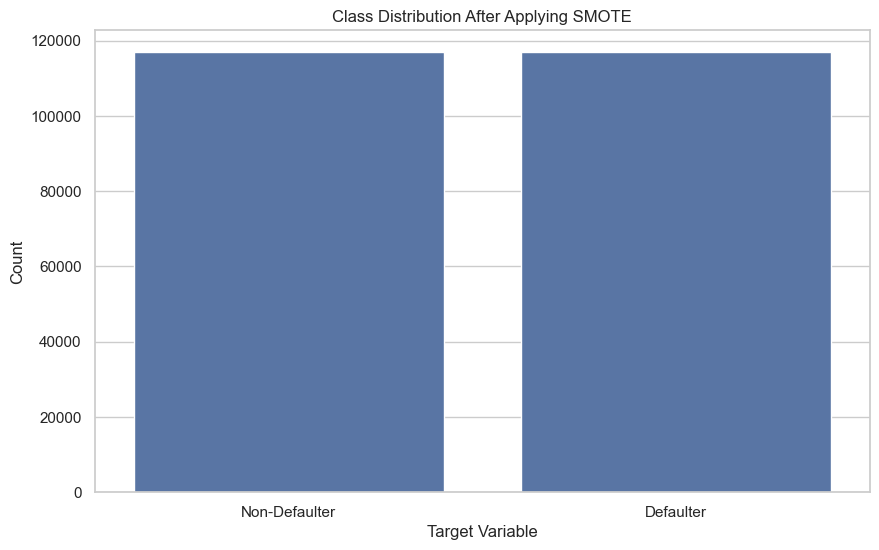

target_variable
0    116914
1    116914
Name: count, dtype: int64


In [32]:
from imblearn.over_sampling import SMOTE

# Define the feature matrix and target vector
X = Loan_encoded_oh.drop(['target_variable'], axis=1)
y = Loan_encoded_oh['target_variable']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=124, sampling_strategy='auto')
X_res, y_res = smote.fit_resample(X, y)

# Plot the class distribution after applying SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(x=y_res)
plt.title('Class Distribution After Applying SMOTE')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.xticks((0, 1), ["Non-Defaulter", "Defaulter"])
plt.show()

print(y_res.value_counts())

With SMOTE we get a feature space with a similar distribution to the original data set, except that in this case we actually have a balanced ratio of the negative and positive examples. Thus our model should be able to learn the patterns associated with both defaults and non-defaults. Here we are interested in both an increase in precision and recall. 

In [33]:
print(X_res.shape, y_res.shape)

(233828, 35) (233828,)


Feature scaling for numerical columns using robust scaler as various features had a lot of outliers. 


In [34]:
num_columns = Loan_renamed.select_dtypes(include=['int64', 'float64']).columns

In [67]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler()

# Exclude the target variable from the numerical columns
num_columns_to_scale = num_columns.drop('target_variable')

# Fit and transform the numerical columns
X_res[num_columns_to_scale] = scaler.fit_transform(X_res[num_columns_to_scale])

# Display the scaled numerical columns
X_res[num_columns_to_scale].head()

,customer_has_bounced_in_first_emi,no_of_times_bounced_12_months,maximum_mob,no_of_times_bounced_while_repaying_the_loan,emi,loan_amount,tenure,dealer_codes_from_where_customer_has_purchased_the_two_wheeler,no_of_advance_emi_paid,rate_of_interest,...,no_of_loans,no_of_secured_loans,no_of_unsecured_loans,max_amount_sanctioned_in_the_live_loans,no_of_new_loans_in_last_3_months,maximum_amount_sanctioned_for_any_two_wheeler_loan,no_of_times_30_days_past_due_in_last_6_months,no_of_times_60_days_past_due_in_last_6_months,no_of_times_90_days_past_due_in_last_3_months,age
0,0.0,0.0,1.460866,0.0,0.268585,0.555015,0.000000,-0.640495,0.000000,0.064782,...,0.000000,0.0,0.0,0.0,0.0,0.271955,0.00,0.000000,0.0,0.613274
1,0.0,1.0,1.460866,1.0,-1.978417,-0.941240,0.000000,0.131295,0.000000,0.453476,...,0.000000,0.0,0.0,0.0,0.0,-0.901100,0.00,0.000000,0.0,1.471858
2,0.0,0.0,1.878257,0.0,-1.470024,-0.065296,1.107976,-0.667588,0.000000,0.021594,...,2.666667,5.0,3.0,-40000.0,0.0,-0.214365,7.75,10.333333,16.0,-0.490619
3,0.0,0.0,1.460866,0.0,-0.460432,0.261183,0.000000,-0.647442,2.350389,-1.338834,...,0.000000,0.0,0.0,0.0,0.0,0.041593,0.00,0.000000,0.0,-1.226548
4,0.0,0.0,2.086952,0.0,-1.189448,0.097944,1.107976,1.273349,0.000000,0.388694,...,0.000000,0.0,0.0,0.0,0.0,-0.086386,0.00,0.000000,0.0,-0.613274


# 6.0 Modelling with balanced data

## 6.1 Model Selection

In [35]:
#Train Test Split: Reserve 30% of data for final model testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(163679, 35) (70149, 35) (163679,) (70149,)


In [70]:
# classification - Random Forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline # Import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


pipe = make_pipeline(PolynomialFeatures(degree=1),RandomForestClassifier())
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.96535924 0.96487048 0.96419844 0.96395406 0.96380021] 0.9644364846054121


The accuracy score of 0.96 is high and close 1. 

In [71]:
# classification - Random Forest with n_estimators=1000,max_depth=10,criterion='gini'
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline # Import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = make_pipeline(PolynomialFeatures(degree=1),RandomForestClassifier(n_estimators=1000,max_depth=10,criterion='gini'))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.91281769 0.90557796 0.90621945 0.90447825 0.90572781] 0.9069642334299501


The accuracy score of 0.90 is high and close to 1. 

In [38]:
# Support vector classification - Linear Kernel  
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC # Import LinearSVC

pipe = make_pipeline(PolynomialFeatures(degree=2), LinearSVC(C=5))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")

print(scores, scores.mean())

[0.53952835 0.71233504 0.56188905 0.59307796 0.56083702] 0.593533485074686


The accuracy score of 0.59 is low. It's not close to 1. 

The 3 classification models commented out below are taking too long to execute and were interrupted. 

In [ ]:
# # Support vector classification - Poly Kernel 
# from sklearn.svm import SVC
# from sklearn.model_selection import cross_val_score
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import PolynomialFeatures

# pipe = make_pipeline(PolynomialFeatures(degree=1), SVC(kernel='poly',C=5))
# scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
# print(scores, scores.mean())

In [ ]:
# ## logistic regression with no regularisation
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.model_selection import cross_val_score

# # Logistic Regression (No Regularisation)
# pipe = make_pipeline(PolynomialFeatures(degree=1), LogisticRegression(penalty='none', solver='lbfgs'))
# scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
# print(scores, scores.mean())

In [ ]:
# SVM classification with RBF Kernel
# from sklearn.svm import SVC
# from sklearn.model_selection import cross_val_score

# # Initialize the SVM classifier with RBF kernel
# svm_rbf = SVC(kernel='rbf', C=10)

# # Fit the model on the training data
# svm_rbf.fit(X_train, y_train)

# # Calculate cross-validation scores
# scores = cross_val_score(svm_rbf, X_train, y_train, cv=5, scoring="accuracy")

# # Print the cross-validation scores and their mean
# print("Cross-validation scores:", scores)
# print("Mean cross-validation score:", scores.mean())

## 6.2 Document the effect of multicolleaniarity in model performance.
1. The model perfomance is slow especially with SVC Classifier models and logistic regression models. The code execution was interrupted as the time taken to execute the code was taking long..

## 6.3 Using and Saving the model

In [39]:
import os
import pickle

# best model chosen is the one with the highest accuracy score of 0.96
model = make_pipeline(PolynomialFeatures(degree=1),RandomForestClassifier()).fit(X_train, y_train)

# Create directory if it does not exist
os.makedirs('final_model', exist_ok=True)

# Save the model with pickle
pickle.dump(model, open('final_model/model.sav', 'wb'))

# 7.0 Generate credit scores based on the probability score from the model

In [43]:
# Load the saved model
model = pickle.load(open('final_model/model.sav', 'rb'))

# Predict probabilities for the test set
probabilities = model.predict_proba(X_test.drop(columns=['credit_score', 'customer_category'], errors='ignore'))[:, 1]

# Generate credit scores based on the probability score
credit_scores = probabilities * 1000

# Categorize customers based on the credit scores
def categorize_customer(score):
    if score <= 200:
        return 'Bad Customer'
    elif score <= 350:
        return '2nd Worst'
    elif score <= 500:
        return 'Not So Bad'
    elif score <= 700:
        return 'Ideal Guys'
    else:
        return 'Big Loans'

customer_categories = [categorize_customer(score) for score in credit_scores]

# Add the credit scores and categories to the test set
X_test['credit_score'] = credit_scores
X_test['customer_category'] = customer_categories

In [45]:
# Display the first few rows of the test set with the new columns
X_test[['credit_score', 'customer_category']].head(20)

,credit_score,customer_category
160805,674.475582,Ideal Guys
70598,40.000000,Bad Customer
90527,0.000000,Bad Customer
171605,960.000000,Big Loans
27645,30.000000,Bad Customer
36711,260.000000,2nd Worst
114782,0.000000,Bad Customer
48216,20.000000,Bad Customer
218252,990.000000,Big Loans
146910,960.000000,Big Loans


## Challenge: 
- Explore the linear separabillity of the two classes and document your intuition of the best model type to give you the best results. - done in EDA
- Document the effect of multicolleaniarity in model performance. 
- Try different classification models and optimize your output for the best result
- Tune your model after learning these in Week 4 - The submission can be done without this step : It is worth noting that feature engineering is of much importance than hyperparametere tuning as the perfomance  improvement with the latter is always only marginal
- Generate Credit Scores based on the probability score from the model (Optional)
- Identify which customers fall into what category, based on the below ranking methodologies 
> #### The following forms our basis for rank ordering 
> - 0 - 200 Bad Customer ,
> - 201-350 2nd Worst, 
> - 351 - 500 Not So bad,
> - 501 - 700 Ideal guys, 
> - 700> Big loans 